# 4.9 Intro to Data Visualization with Python

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import orders_products_merged_refined.pkl from PKL file

path = r'C:\Users\natha\OneDrive\Desktop\Data Analytics\Jupyter\09-2023 Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_refined_48.pkl'))

## Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

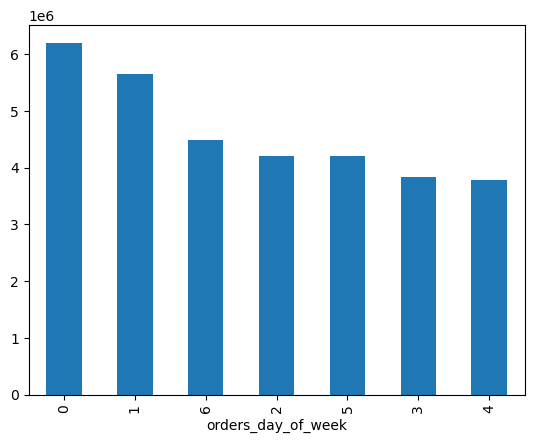

In [3]:
# Create a bar chart

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

In [4]:
# Check value counts

ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204090
1    5660099
6    4496415
2    4213729
5    4205663
3    3840449
4    3783716
Name: count, dtype: int64

In [5]:
# Check value counts with index sorting

ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204090
1    5660099
2    4213729
3    3840449
4    3783716
5    4205663
6    4496415
Name: count, dtype: int64

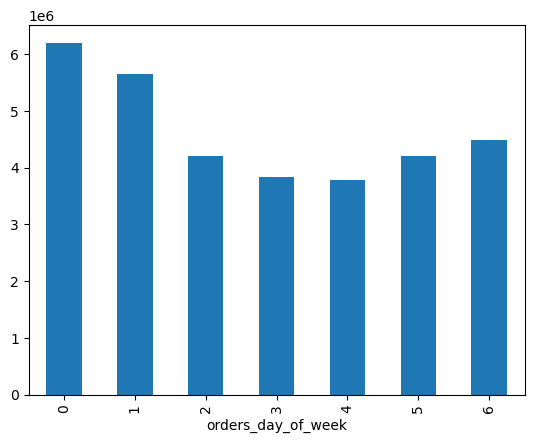

In [6]:
# The sort_index() function will sort the bars in your chart according to their index order (rather than largest to smallest).

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

### *While the numbers stay the same, the order in which they appear has changed. This can be useful if your data would be easier to understand in its original order. Days of the week or months of the year, for instance, would be better understood if they were listed chronologically.*

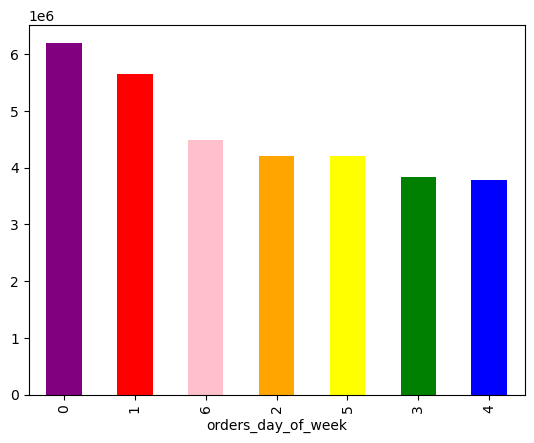

In [7]:
# Color indexing

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

### *Now, your bar chart has been saved within the bar object, and you’ll be able to access it any time you like by calling bar.figure. The next step is to export it outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function:*

In [8]:
# Export bar chart outside of Jupyter using the figure.savefig() function:

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

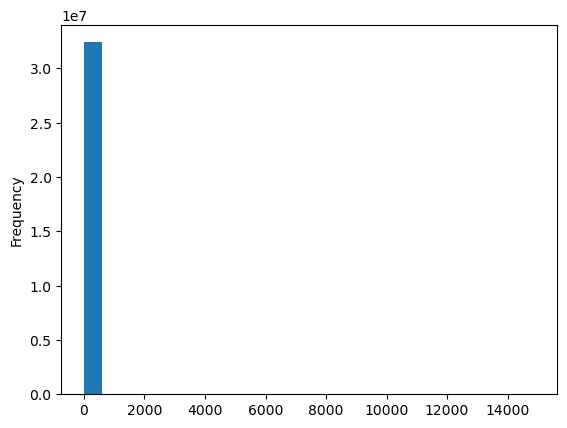

In [9]:
# Create Histogram

ords_prods_merge['prices'].plot.hist(bins = 25)

In [10]:
# Data integrity check

ords_prods_merge['prices'].describe()

count    3.240416e+07
mean     9.826461e+00
std      1.741449e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      1.490000e+04
Name: prices, dtype: float64

In [11]:
ords_prods_merge['prices'].mean()

9.826460885686886

In [12]:
ords_prods_merge['prices'].median()

7.4

In [13]:
ords_prods_merge['prices'].max()

14900.0

<Axes: xlabel='prices', ylabel='prices'>

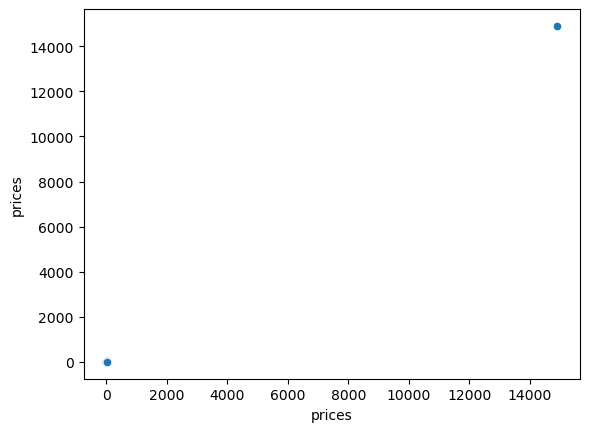

In [14]:
# Create scatterplot to view outliers!

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [15]:
# Run outlier check on any supermarket item above $100 price

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_mean_price,spending_flag,order_frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,0,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,1,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,0,both,High-range product,Regularly busy,Fewest orders,4,New customer,1154.792308,High spender,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,1,both,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High spender,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,0,both,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13104571,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3172853,205650,18,1,9,...,1,both,High-range product,Busiest days,Most orders,25,Regular customer,351.141618,High spender,Frequent customer
13104572,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2504315,205818,3,5,15,...,0,both,High-range product,Regularly busy,Most orders,25,Regular customer,170.073770,High spender,Regular customer
13104573,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,1108388,205818,5,4,5,...,1,both,High-range product,Slowest days,Fewest orders,25,Regular customer,170.073770,High spender,Regular customer
13104574,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,1916142,206049,1,2,17,...,0,both,High-range product,Regularly busy,Most orders,5,New customer,938.031250,High spender,Frequent customer


In [16]:
# Turn all outliers in 'prices' over $100 into "NaNs"

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [17]:
# Checking 'prices' with the new np.nan values

ords_prods_merge['prices'].max()

25.0

### *Now that we have replaced all your outliers with missing values, your max value is a much more realistic price point of 25.*

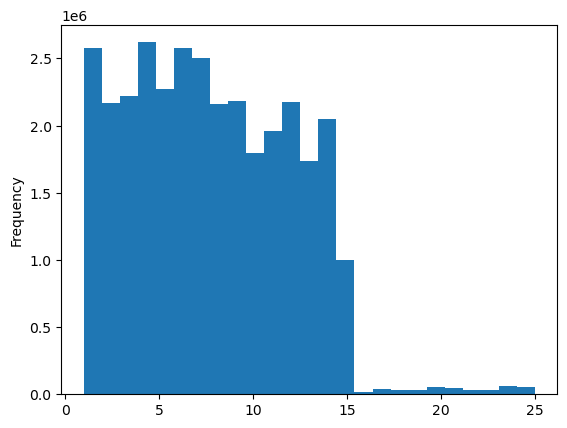

In [18]:
# Create histogram again

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

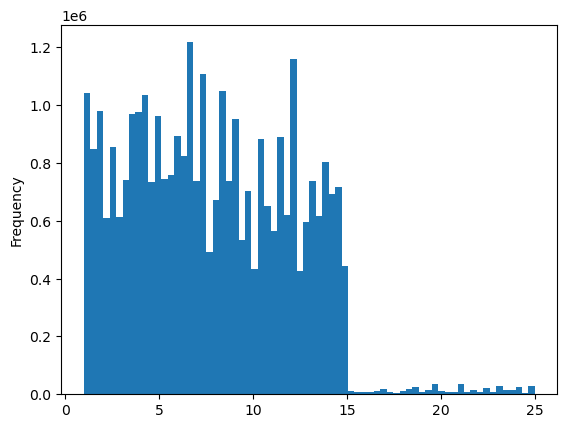

In [19]:
# Create histogram again... with bins set to 70

hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [20]:
# Export histogram chart outside of Jupyter using the figure.savefig() function:

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_49.png'))

## Creating Line Charts
### *We need to sample the data, the full data set is likely too large for computing when creating line charts*

### Sampling Data
#### *In order to create a subset that actually represents the entirety of your data,  those rows would need to be randomized. We can’t simply choose from the first or last customers in the dataframe—it needs to be a random assortment taken from all throughout the dataframe. Only then can we be sure it accurately represents the dataframe as a whole.*

In [21]:
# Set a random seed for reproducibility

np.random.seed(4)

In [22]:
# Create a list holding True/False values to the test no.random.rand() <= 0.7

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [23]:
# Store 70% of the sample in the dataframe 'big'

big = ords_prods_merge[dev]

In [24]:
# Store 30% of the sample in the dataframe 'small'

small = ords_prods_merge[~dev]

So, to recap each piece of the split code, we need to:

1. Set the seed for the random number generator.
2. Create random numbers (the length of our ords_prods_merge dataframe) ranging between 0 and 1.
3. Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
4. Store the results of the test in a new list, dev, in the form of boolean values (True and False).

#### *If big is 70 percent of ords_prods_merge and small is 30 percent of ords_prods_merge then, theoretically, if you added the rows of both samples together, you’d get the same numbers of rows as your original ords_prods_merge dataframe. Let’s give it a try using the len() function again:*

In [25]:
len(ords_prods_merge)

32404161

In [26]:
len(big) + len(small)

32404161

In [27]:
# This creates a new dataframe, df_2, that contains only the “prices” and “orders_day_of_week” columns from your 'small' subset.

df_2 = small[['orders_day_of_week','prices']]

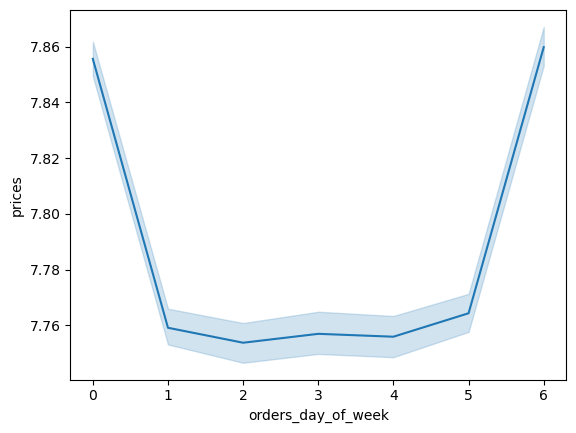

In [28]:
# Create line plot of 'prices' and 'orders_day_of_week' using df_2 dataframe

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [29]:
# Export line chart outside of Jupyter using the figure.savefig() function:

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_versus_ordersdayofweek.png'))

In [30]:
# Export ords_prods_merge DataFrame to PKL

path = r'C:\Users\natha\OneDrive\Desktop\Data Analytics\Jupyter\09-2023 Instacart Basket Analysis'
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge_refined_49.pkl'))